# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)
len(countries)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

city_counter = 0
weather_data_list = []
for city in cities:
    #city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #country code?/
    request_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    weather_output = requests.get(request_url).json()
    if weather_output["cod"] == 200 :
       # print(weather_output)
       # print (json.dumps(weather_output,indent=4,sort_keys=True))
        city_counter = city_counter + 1
        print (f"{city} {city_counter} was processed")
        #City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
        #clouds: All  ()
        clouds = weather_output["clouds"]["all"]
        try:
            country = weather_output["sys"]["country"]
        except KeyError:
            #country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
            country =  countries[cities.index(city)]
        date = weather_output["dt"]
        humidity = weather_output["main"]["humidity"]
        latitude = weather_output["coord"]["lat"]
        longitude = weather_output["coord"]["lon"]
        max_temp = weather_output["main"]["temp_max"]
        wind_speed = weather_output["wind"]["speed"]
        city_weather = [city,clouds,country,date,humidity,latitude,longitude,max_temp,wind_speed]
        weather_data_list.append(city_weather)
weather_data_frame = pd.DataFrame(weather_data_list,columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
weather_data_frame.head()
    


kaitangata 1 was processed
jamestown 2 was processed
castro 3 was processed
busselton 4 was processed
mahebourg 5 was processed
rikitea 6 was processed
albany 7 was processed
hermanus 8 was processed
hilo 9 was processed
butaritari 10 was processed
punta arenas 11 was processed
passo de camaragibe 12 was processed
avarua 13 was processed
ketchikan 14 was processed
necochea 15 was processed
ranghulu 16 was processed
vaini 17 was processed
yatou 18 was processed
ushuaia 19 was processed
lebu 20 was processed
polunochnoye 21 was processed
lagoa 22 was processed
billings 23 was processed
huarmey 24 was processed
arraial do cabo 25 was processed
port alfred 26 was processed
victoria 27 was processed
mataura 28 was processed
nanortalik 29 was processed
karratha 30 was processed
upernavik 31 was processed
aswan 32 was processed
hambantota 33 was processed
mayskiy 34 was processed
nome 35 was processed
qaanaaq 36 was processed
iqaluit 37 was processed
kenai 38 was processed
atuona 39 was proce

kurumkan 309 was processed
puksoozero 310 was processed
najran 311 was processed
college 312 was processed
chapais 313 was processed
diglur 314 was processed
rusape 315 was processed
revelstoke 316 was processed
cururupu 317 was processed
urucara 318 was processed
fukue 319 was processed
ayagoz 320 was processed
zonguldak 321 was processed
port lincoln 322 was processed
saint-augustin 323 was processed
kibala 324 was processed
vardo 325 was processed
chechat 326 was processed
mandalgovi 327 was processed
rio gallegos 328 was processed
marzuq 329 was processed
corinto 330 was processed
prado 331 was processed
grants pass 332 was processed
vanimo 333 was processed
tura 334 was processed
sept-iles 335 was processed
sibolga 336 was processed
gidole 337 was processed
poya 338 was processed
westport 339 was processed
ozernovskiy 340 was processed
port macquarie 341 was processed
kuruman 342 was processed
saint anthony 343 was processed
poplar bluff 344 was processed
daura 345 was processed
m

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,92,NZ,1573864819,78,-46.28,169.85,286.48,4.47
1,jamestown,41,AU,1573864814,34,-33.21,138.60,291.39,1.50
2,castro,98,CL,1573864809,81,-42.48,-73.76,285.15,4.10
3,busselton,68,AU,1573864780,29,-33.64,115.35,301.48,5.33
4,mahebourg,75,MU,1573864786,69,-20.41,57.70,297.15,5.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data_frame.to_csv(r'weather_data_frame.csv')

In [10]:
display(weather_data_frame)
weather_data_frame.to_html(r'weather_data_frame.html')


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,92,NZ,1573864819,78,-46.28,169.85,286.48,4.47
1,jamestown,41,AU,1573864814,34,-33.21,138.60,291.39,1.50
2,castro,98,CL,1573864809,81,-42.48,-73.76,285.15,4.10
3,busselton,68,AU,1573864780,29,-33.64,115.35,301.48,5.33
4,mahebourg,75,MU,1573864786,69,-20.41,57.70,297.15,5.70
...,...,...,...,...,...,...,...,...,...
546,ajra,0,IN,1573865089,90,16.12,74.21,293.82,2.75
547,pacasmayo,63,PE,1573865089,81,-7.40,-79.57,292.15,5.83
548,san pedro de macoris,40,DO,1573865089,88,18.46,-69.30,298.71,2.10
549,rubio,40,VE,1573865089,78,7.70,-72.36,300.15,1.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

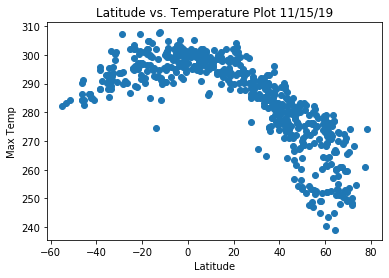

In [6]:
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Max Temp"])
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature Plot {}".format(time.strftime("%x")))
plt.savefig("lattitude_vs_temperature.png")

#### Latitude vs. Humidity Plot

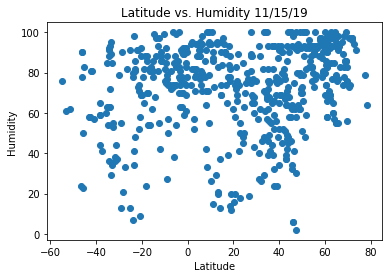

In [7]:
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Humidity"])
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity {}".format(time.strftime("%x")))
plt.savefig("lattitude_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

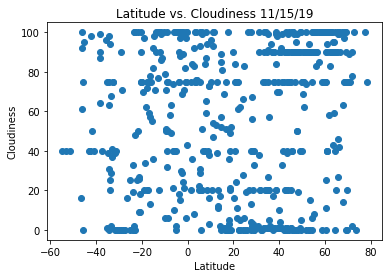

In [8]:
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Cloudiness"])
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness {}".format(time.strftime("%x")))
plt.savefig("lattitude_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

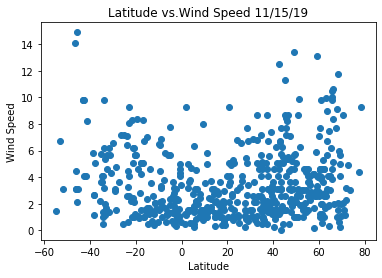

In [9]:
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Wind Speed"])
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Latitude vs.Wind Speed {}".format(time.strftime("%x")))
plt.savefig("lattitude_vs_wind_speed.png")